## Dataset Statisitcal Analysis

In [1240]:
from utils import *
from chess_feature_extractors import *
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import chess.svg
games_df = pd.read_csv("./Maia-Leela-Stock-empiricalQ.csv")
unique_games_df = games_df.drop_duplicates(subset='game')
grouped_df = unique_games_df.groupby('game')['result'].value_counts().unstack(fill_value=0)
total_wins = grouped_df['win'].sum()
total_losses = grouped_df['lose'].sum()
total_draws = grouped_df['draw'].sum()
win_percent = total_wins / (total_wins + total_draws + total_losses) * 100
print(f"Total wins number: {total_wins}\n"
      f"Total losses number: {total_losses}\n"
      f"Total draws number: {total_draws}")
print(f"Win percent: {win_percent.__round__(3)}%")

Total wins number: 7405
Total losses number: 604
Total draws number: 486
Win percent: 87.169%


In [1241]:
grouped_df = games_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
grouped_df['moves_num'] = grouped_df['agreed'] + grouped_df['leela10b2500'] + grouped_df['maia1200'] + grouped_df['random']
grouped_df['agreed_percent'] = ((grouped_df['agreed'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['random_percent'] = ((grouped_df['random'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['leela_percent'] = ((grouped_df['leela10b2500'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['maia_percent'] = ((grouped_df['maia1200'] / grouped_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in a game: {grouped_df['agreed_percent'].mean().__round__(3)}%, variance: {grouped_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in a game: {grouped_df['random_percent'].mean().__round__(3)}%, variance: {grouped_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in a game: {grouped_df['leela_percent'].mean().__round__(3)}%, variance: {grouped_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in a game: {grouped_df['maia_percent'].mean().__round__(3)}%, variance: {grouped_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in a game: 58.665%, variance: 89.216
Average percent of random moves in a game: 15.576%, variance: 98.322
Average percent of Leela moves in a game: 16.177%, variance: 86.358
Average percent of Maia moves in a game: 9.582%, variance: 54.649


In [1242]:
win_df = games_df[games_df['result'] == 'win']
win_df = win_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
win_df['moves_num'] = win_df['agreed'] + win_df['leela10b2500'] + win_df['maia1200'] + win_df['random']
win_df['agreed_percent'] = ((win_df['agreed'] / win_df['moves_num']) * 100).__round__(3)
win_df['random_percent'] = ((win_df['random'] / win_df['moves_num']) * 100).__round__(3)
win_df['leela_percent'] = ((win_df['leela10b2500'] / win_df['moves_num']) * 100).__round__(3)
win_df['maia_percent'] = ((win_df['maia1200'] / win_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in won games: {win_df['agreed_percent'].mean().__round__(3)}%, variance: {win_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in won games: {win_df['random_percent'].mean().__round__(3)}%, variance: {win_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in won games: {win_df['leela_percent'].mean().__round__(3)}%, variance: {win_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in won games: {win_df['maia_percent'].mean().__round__(3)}%, variance: {win_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in won games: 58.303%, variance: 86.815
Average percent of random moves in won games: 16.757%, variance: 93.854
Average percent of Leela moves in won games: 15.594%, variance: 84.339
Average percent of Maia moves in won games: 9.346%, variance: 56.052


In [1243]:
lose_df = games_df[games_df['result'] == 'lose']
lose_df = lose_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
lose_df['moves_num'] = lose_df['agreed'] + lose_df['leela10b2500'] + lose_df['maia1200'] + lose_df['random']
lose_df['agreed_percent'] = ((lose_df['agreed'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['random_percent'] = ((lose_df['random'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['leela_percent'] = ((lose_df['leela10b2500'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['maia_percent'] = ((lose_df['maia1200'] / lose_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in lost games: {lose_df['agreed_percent'].mean().__round__(3)}%, variance: {lose_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of random moves in lost games: {lose_df['random_percent'].mean().__round__(3)}%, variance: {lose_df['random_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in lost games: {lose_df['leela_percent'].mean().__round__(3)}%, variance: {lose_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in lost games: {lose_df['maia_percent'].mean().__round__(3)}%, variance: {lose_df['maia_percent'].var().__round__(3)}")


Average percent of agreed moves in lost games: 60.356%, variance: 98.053
Average percent of random moves in lost games: 10.193%, variance: 58.947
Average percent of Leela moves in lost games: 18.017%, variance: 65.415
Average percent of Maia moves in lost games: 11.434%, variance: 42.175


General statistics of the scores and confidence for each bot:

In [1244]:
selected = ['maia1200_eval', 'maia1200_conf', 'leela10b2500_eval', 'leela10b2500_conf']
conf_eval = games_df[selected]
conf_eval.describe()

,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,343041.000000,343041.000000,343041.000000,343041.000000
mean,0.121058,0.925485,0.144016,0.914628
std,0.788818,0.144415,0.799950,0.154787
min,-1.000000,0.200000,-1.000000,0.200000
25%,-1.000000,1.000000,-1.000000,0.800000
50%,0.500000,1.000000,0.500000,1.000000
75%,0.680000,1.000000,0.780000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Now, let's look at the eval and confidence statistics of each bot when its move is chosen.

In [1245]:
maia_df = games_df.loc[games_df['contributor'] == 'maia1200']
leela_df = games_df.loc[games_df['contributor'] == 'leela10b2500']
maia_df = maia_df[selected]
leela_df = leela_df[selected]

print("Confidence and eval stats when Maia is chosen:")
maia_df.describe()

Confidence and eval stats when Maia is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,32346.000000,32346.000000,32346.000000,32346.000000
mean,0.756683,0.889600,0.584128,0.849379
std,0.276748,0.166077,0.306924,0.185017
min,0.020000,0.400000,0.000000,0.200000
25%,0.580000,0.800000,0.360000,0.600000
50%,0.860000,1.000000,0.580000,1.000000
75%,1.000000,1.000000,0.880000,1.000000
max,1.000000,1.000000,0.980000,1.000000


In [1246]:
print("Confidence and eval stats when Leela is chosen:")
leela_df.describe()

Confidence and eval stats when Leela is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,56418.000000,56418.000000,56418.000000,56418.000000
mean,0.474346,0.852434,0.712869,0.883633
std,0.266778,0.181934,0.234694,0.170773
min,0.000000,0.200000,0.020000,0.200000
25%,0.280000,0.800000,0.540000,0.800000
50%,0.440000,1.000000,0.720000,1.000000
75%,0.660000,1.000000,0.940000,1.000000
max,0.980000,1.000000,1.000000,1.000000


Now we'll calculate the Pearson correlation between eval and confidence for each bot:

In [1247]:
correlation_matrix = games_df.corr()
maia_conf_eval_correlation = correlation_matrix.loc['maia1200_conf', 'maia1200_eval']
print(f"Correlation between Maia confidence and eval: {maia_conf_eval_correlation.__round__(3)}")
leela_conf_eval_correlation = correlation_matrix.loc['leela10b2500_conf', 'leela10b2500_eval']
print(f"Correlation between Leela confidence and eval: {leela_conf_eval_correlation.__round__(3)}")

Correlation between Maia confidence and eval: -0.13
Correlation between Leela confidence and eval: -0.175


As we can see, the Pearson correlation of confidence and eval in both Maia and Leela is negative, which implies an inverse relationship, when one goes up, the other usually goes down.
Next we'll look at the Pearson correlation of confidence and move number and of eval and move number.

In [1248]:
maia_conf_move_correlation = correlation_matrix.loc['maia1200_conf', 'ply']
maia_eval_move_correlation = correlation_matrix.loc['maia1200_eval', 'ply']
leela_conf_move_correlation = correlation_matrix.loc['leela10b2500_conf', 'ply']
leela_eval_move_correlation = correlation_matrix.loc['leela10b2500_eval', 'ply']

print(f"Correlation between Maia confidence and move number: {maia_conf_move_correlation.__round__(3)}")
print(f"Correlation between Maia eval and move number: {maia_eval_move_correlation.__round__(3)}")
print(f"Correlation between Leela confidence and move number: {leela_conf_move_correlation.__round__(3)}")
print(f"Correlation between Leela eval and move number: {leela_eval_move_correlation.__round__(3)}")

Correlation between Maia confidence and move number: 0.081
Correlation between Maia eval and move number: 0.104
Correlation between Leela confidence and move number: -0.109
Correlation between Leela eval and move number: 0.081


From this we can learn that Maia's confidence and eval rise a bit as the game progresses, and so is Leela's eval. On the other hand, we can also see that Leela's confidence decreases.

Next, we'll want to plot each bot's mean evaluation and confidence as a function of move number to see the way it shifts during the game.

Text(0, 0.5, 'Mean Evaluation')

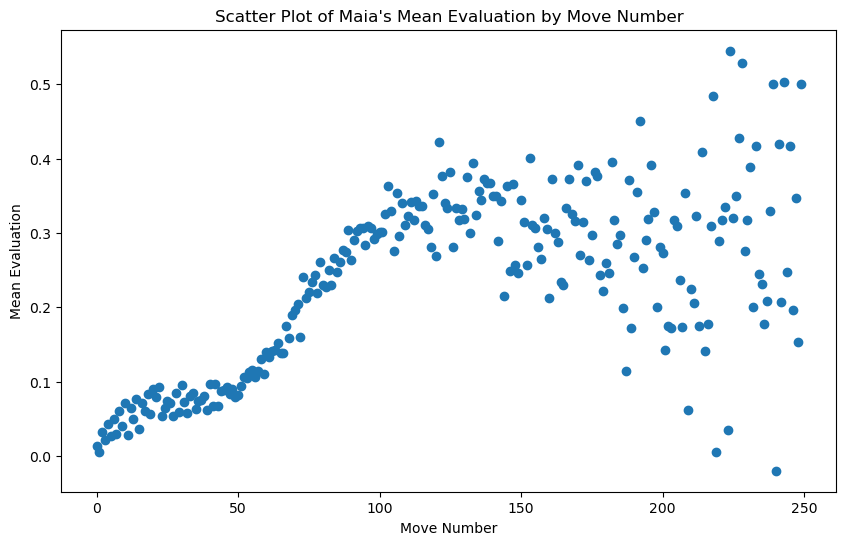

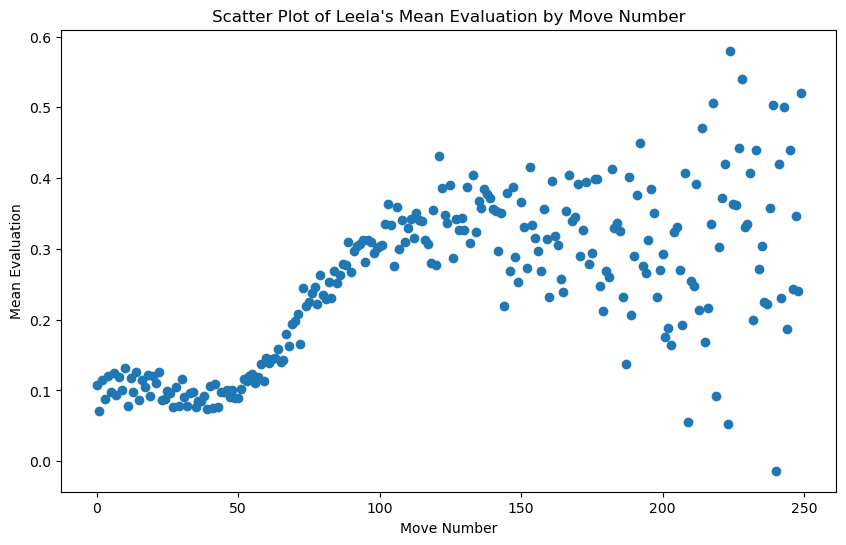

In [1249]:
mean_evaluation_by_move = games_df.groupby('ply')['maia1200_eval'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 250]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_eval'], label="Maia's Evaluation")
plt.title("Scatter Plot of Maia's Mean Evaluation by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Evaluation')
mean_evaluation_by_move = games_df.groupby('ply')['leela10b2500_eval'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 250]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_eval'], label="Leela's Evaluation")
plt.title("Scatter Plot of Leela's Mean Evaluation by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Evaluation')

Text(0, 0.5, 'Mean Confidence')

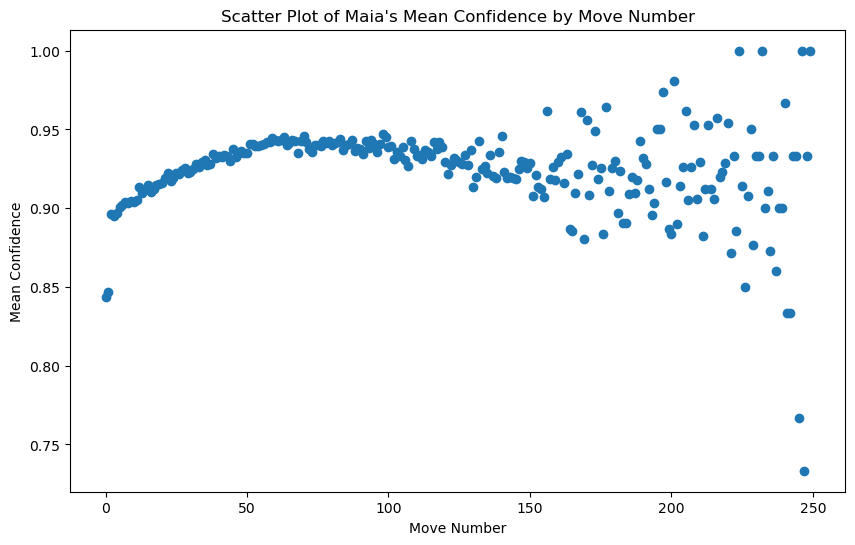

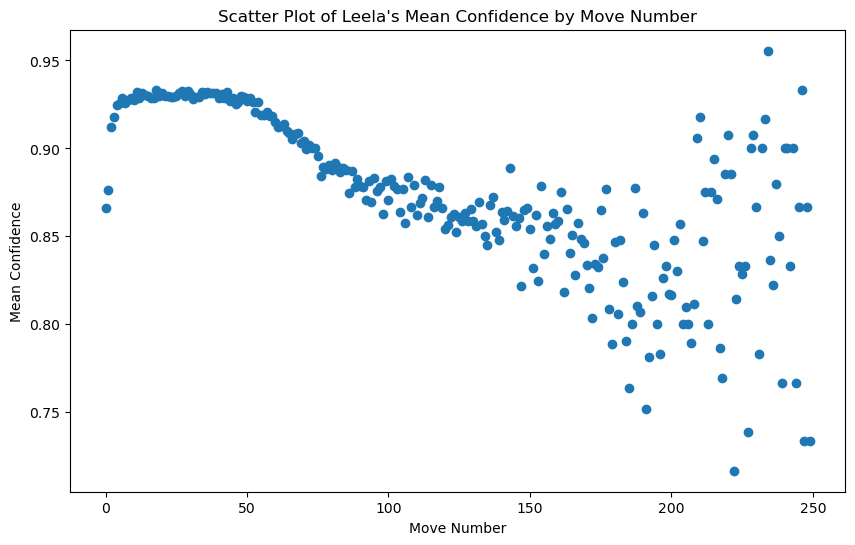

In [1250]:
mean_evaluation_by_move = games_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 250]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = games_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 250]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

In [1251]:
games_df["maia_better"] = games_df['maia1200_eval'] > games_df['leela10b2500_eval']
maia_better_df = games_df[games_df['maia_better'] == True]
maia_better_sam = maia_better_df.sample(500)
leela_better_df = games_df[games_df['maia_better'] == False]
feats_arr = maia_better_sam['position'].apply(board_features).apply(lambda feat: feat.extract())
vector_array = np.array(feats_arr)
mean_vector = np.mean(vector_array, axis=0)
# variance_vector = np.var(vector_array, axis=0)
print(mean_vector)

[0.    0.106 0.07  ... 0.014 0.    0.002]


Now, we'll check the move properties when Maia's move is better, and when Leela's move is better.

In [1252]:
move_feats_maia = []
maia_better_sam = maia_better_df.sample(10000)
for ind, row in maia_better_sam.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features when it's better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when it's better:
distance: Mean = 1.829, Variance = 1.332
king approach: Mean = -0.677, Variance = 1.797
advance/ retreat: Mean = 0.15, Variance = 0.128
flanking: Mean = 0.778, Variance = 0.173
pawn: Mean = 0.234, Variance = 0.18
rook: Mean = 0.212, Variance = 0.167
knight: Mean = 0.151, Variance = 0.128
bishop: Mean = 0.146, Variance = 0.125
queen: Mean = 0.149, Variance = 0.127
king: Mean = 0.108, Variance = 0.096
check: Mean = 0.121, Variance = 0.106
capture: Mean = 0.188, Variance = 0.153
castle: Mean = 0.01, Variance = 0.01


In [1253]:
move_feats_leela = []
for ind, row in maia_better_sam.sample(10000).iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features when Maia's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when Maia's move is better:
distance: Mean = 1.778, Variance = 1.206
king approach: Mean = -0.535, Variance = 1.78
advance/ retreat: Mean = 0.17, Variance = 0.141
flanking: Mean = 0.784, Variance = 0.169
pawn: Mean = 0.218, Variance = 0.17
rook: Mean = 0.232, Variance = 0.178
knight: Mean = 0.137, Variance = 0.118
bishop: Mean = 0.15, Variance = 0.127
queen: Mean = 0.146, Variance = 0.125
king: Mean = 0.117, Variance = 0.104
check: Mean = 0.06, Variance = 0.056
capture: Mean = 0.162, Variance = 0.136
castle: Mean = 0.007, Variance = 0.007


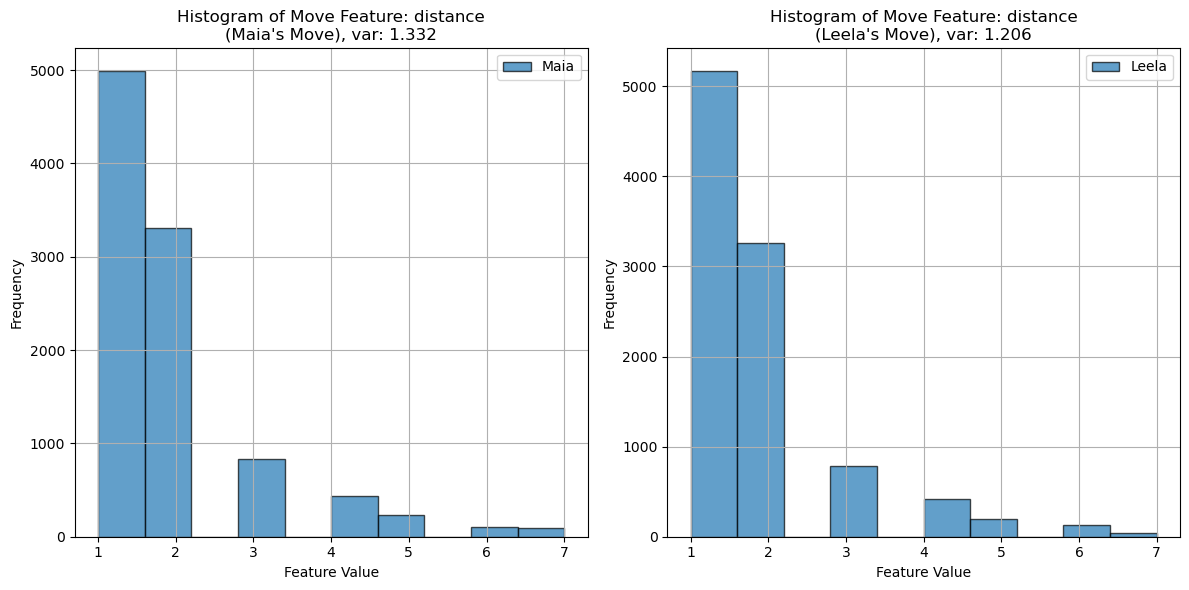

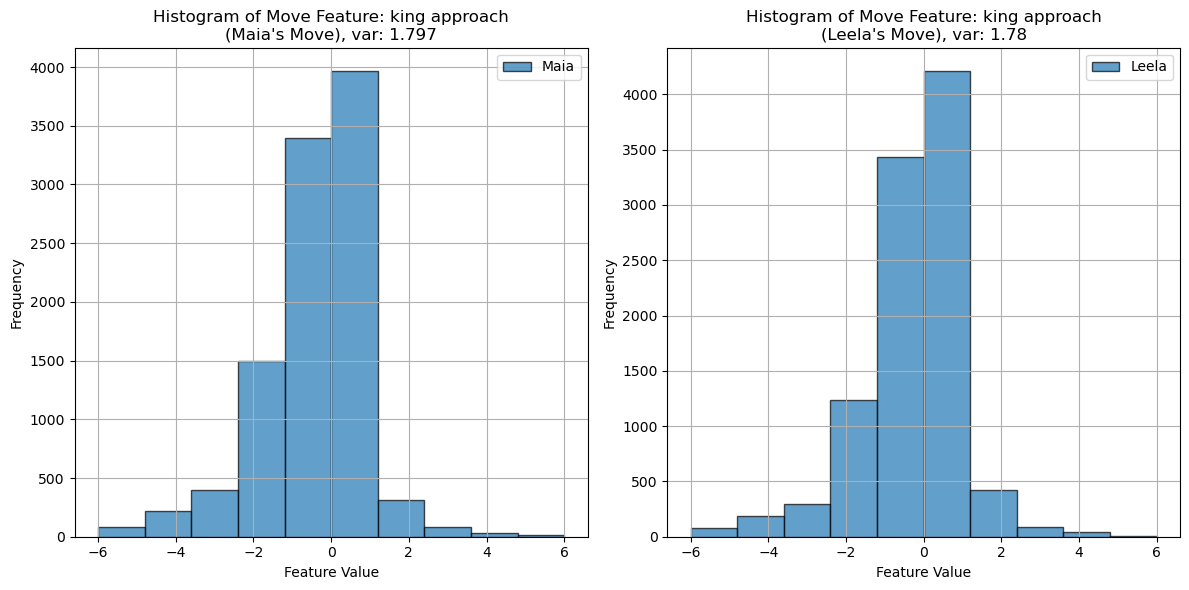

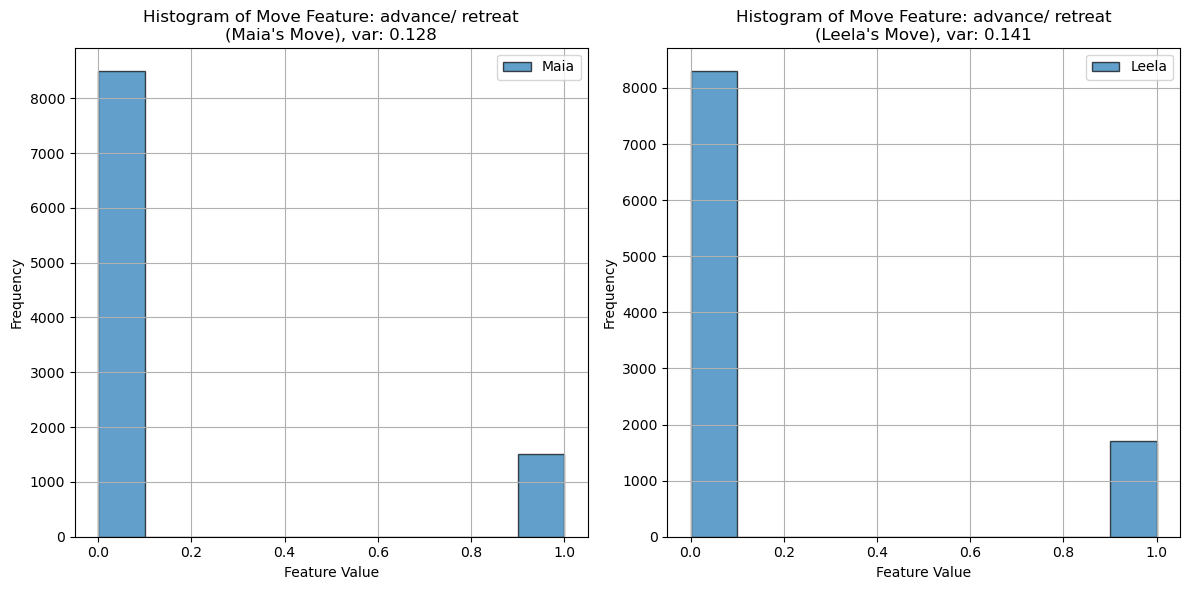

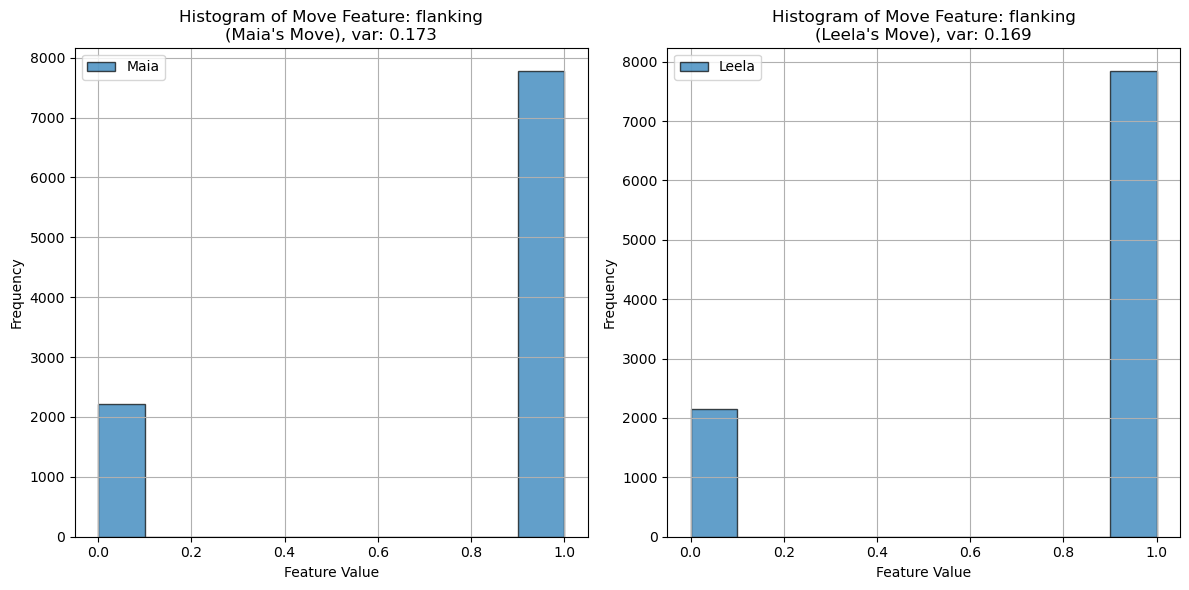

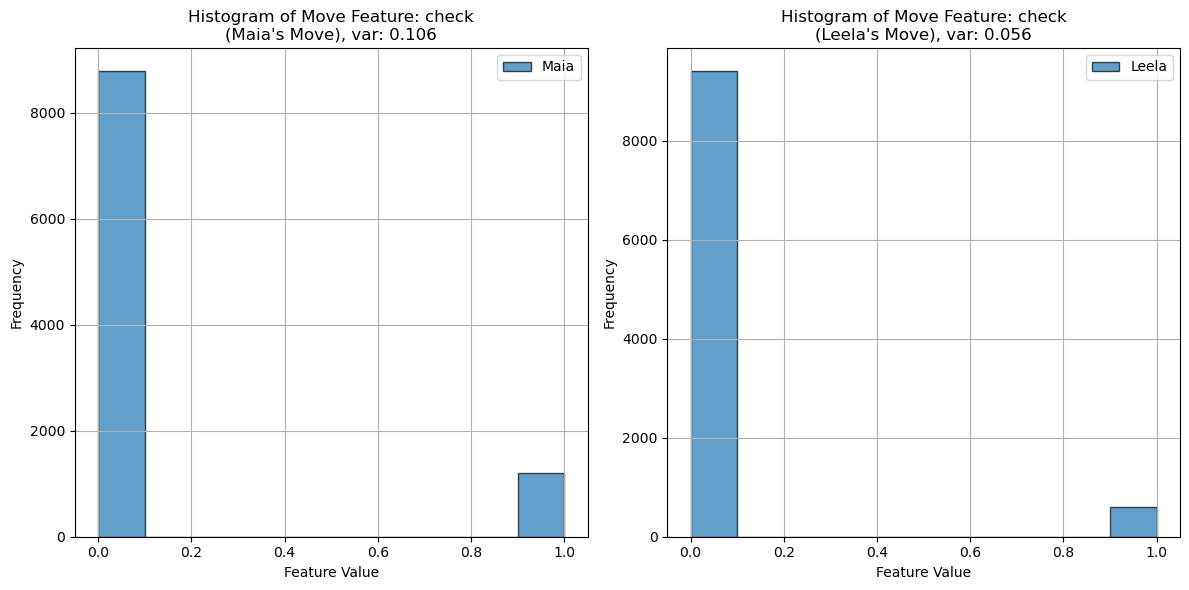

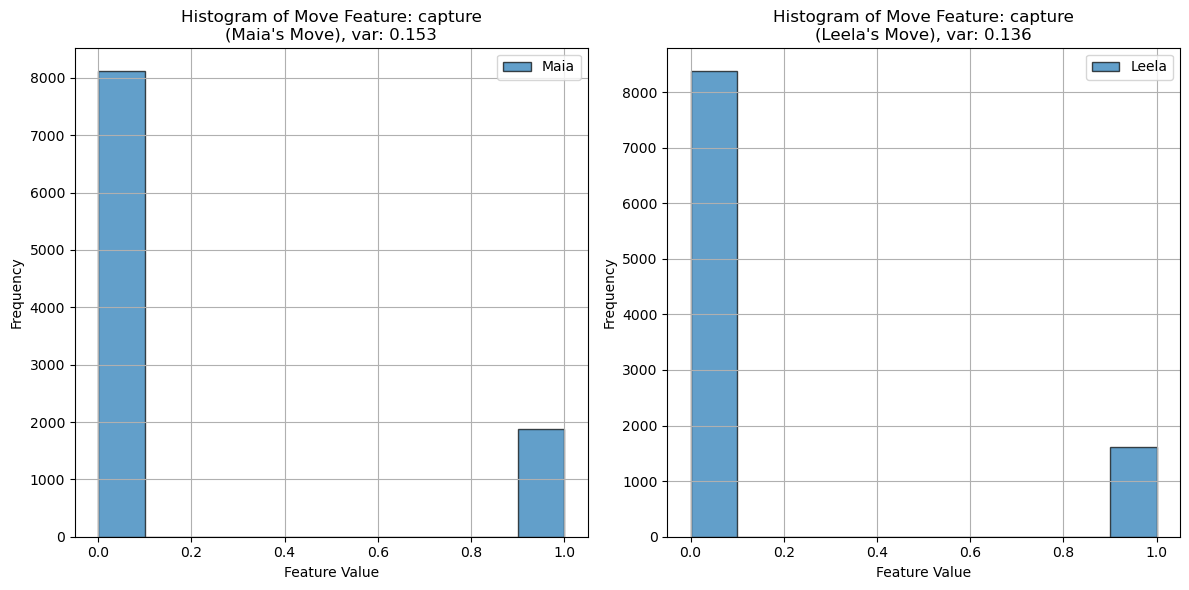

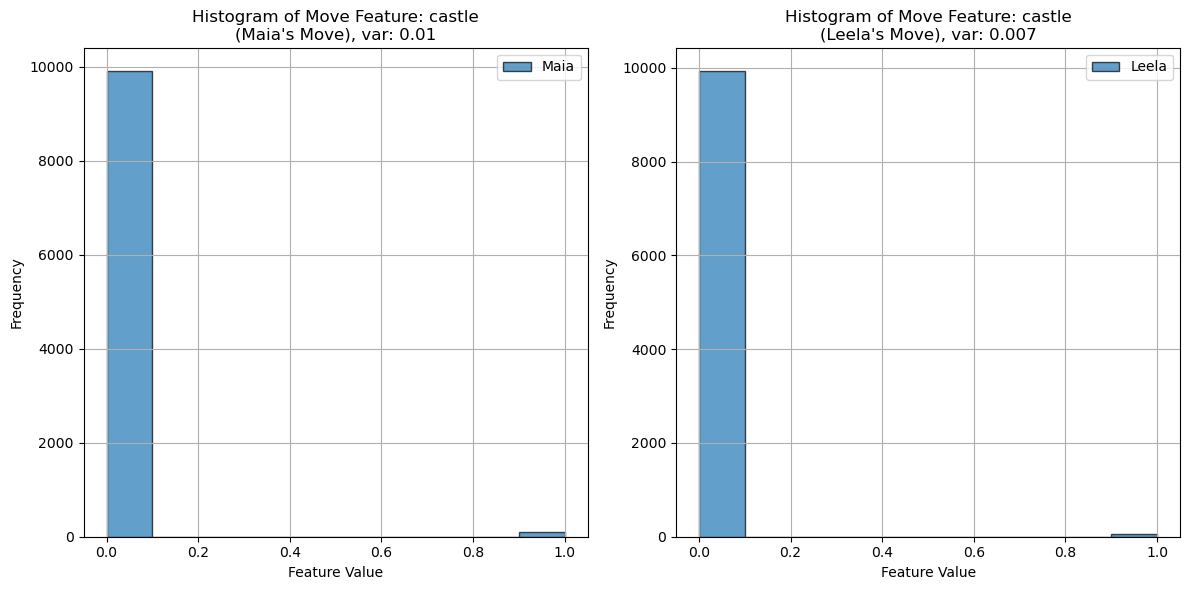

In [1261]:
for i in range(vector_array_maia.shape[1]):
    if 4 <= i <= 9:
        continue
    plt.figure(figsize=(12, 6))

    # Create Maia's histogram
    plt.subplot(1, 2, 1)
    plt.hist(vector_array_maia[:, i], bins=10, edgecolor='black', alpha=0.7, label='Maia')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Maia's Move), var: {variance_vector_maia[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.legend()

    # Create Leela's histogram
    plt.subplot(1, 2, 2)
    plt.hist(vector_array_leela[:, i], bins=10, edgecolor='black', alpha=0.7, label='Leela')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Leela's Move), var: {variance_vector_leela[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

Now, we'll look for the situations in which the difference between Maia's eval and Leela's eval was the largest in favor of Maia, and check if we can find a pattern.

Maia's move: e6h6, Leela's move: e6e3, result: lose.


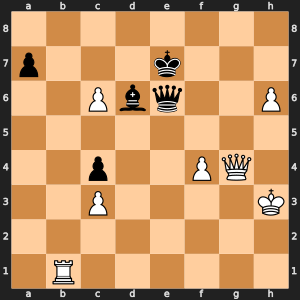

Maia's move: f7f6, Leela's move: d6d5, result: lose.


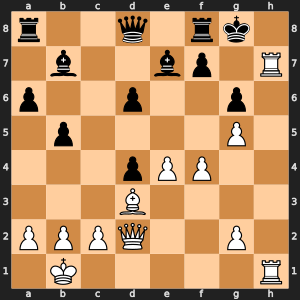

Maia's move: f7f6, Leela's move: e8e2, result: win.


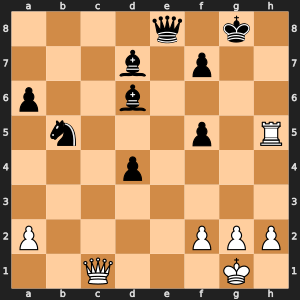

Maia's move: c8g4, Leela's move: c8f8, result: win.


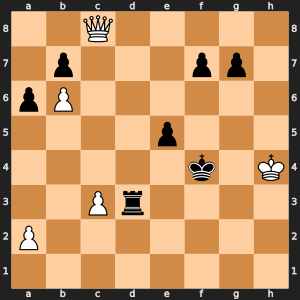

Maia's move: d7e5, Leela's move: f5e7, result: win.


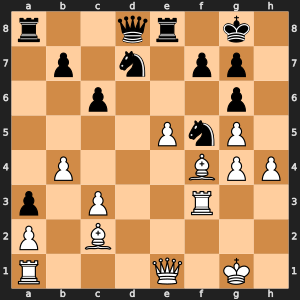

In [1255]:
games_df["eval_diff"] = games_df["maia1200_eval"] - games_df["leela10b2500_eval"]
top_samples = games_df.nlargest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    print(f"Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}.")
    display(SVG(chess.svg.board(board, size=300)))